In [1]:
from Final_Backend import *
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates

In [ ]:
#Dates that will be tested
testdatums = [dt.datetime(2016,6,25), dt.datetime(2016,8,15), dt.datetime(2016,12,8),
              dt.datetime(2017,4,1),dt.datetime(2017,5,20), dt.datetime(2017, 11, 11),
              dt.datetime(2018, 1, 3), dt.datetime(2018, 7, 13), dt.datetime(2018, 10, 26),
              dt.datetime(2019, 2,3),dt.datetime(2019, 5, 24),dt.datetime(2019,9,20)]

#choice of model "lstm" of "seq", seq means sequential
modelchoice = "lstm"

#do you want to retrain the neural network or use the existing parameters "n" or "y"
train_the_model = "n"


In [ ]:
#structure of the lstm neural network
belpex_layers=6
n_features_bel = [66,66*3,66*3,3*66,3*66,66]
bel_epochs = 500

solar_layers=6
n_features_sol = [66,66*2,66*2,2*66,2*66,66]
sol_epochs=500

In [ ]:
#structure of the sequential neural network
nodesperlayer_sol = [96,192,192,192,192,96]
activationfunctions_sol = ['relu','relu','relu','relu','relu','linear']
epochs_sol = 300

nodesperlayer_bel = [96,192,192,96]
activ_bel = ['relu','relu','relu','linear']
epochs_bel = 500

In [ ]:
solarlstm_predictions, belpexlstm_predictions,ybel_test,ysol_test = lstm_definer(train_the_model,testdatums, belpex_layers,n_features_bel,bel_epochs,solar_layers,n_features_sol,sol_epochs)

(1328, 66, 5) (1328, 66) (12, 66, 5) (12, 66)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128)               68608     
                                                                 
 dense (Dense)               (None, 198)               25542     
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 198)               0         
                                                                 
 dropout (Dropout)           (None, 198)               0         
                                                                 
 dense_1 (Dense)             (None, 198)               39402     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 198)               0         
                                                                 
 dropout_1

In [ ]:
solarseq_predictions,belpexseq_predictions = seq_definer(train_the_model,testdatums,epochs_bel,epochs_sol,activ_bel,activationfunctions_sol,nodesperlayer_bel,nodesperlayer_sol)

Model: "Optimizer"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 192)               18624     
                                                                 
 drop1 (Dropout)             (None, 192)               0         
                                                                 
 layer2 (Dense)              (None, 192)               37056     
                                                                 
 drop2 (Dropout)             (None, 192)               0         
                                                                 
 layer3 (Dense)              (None, 192)               37056     
                                                                 
 drop3 (Dropout)             (None, 192)               0         
                                                                 
 layer4 (Dense)              (None, 192)               37

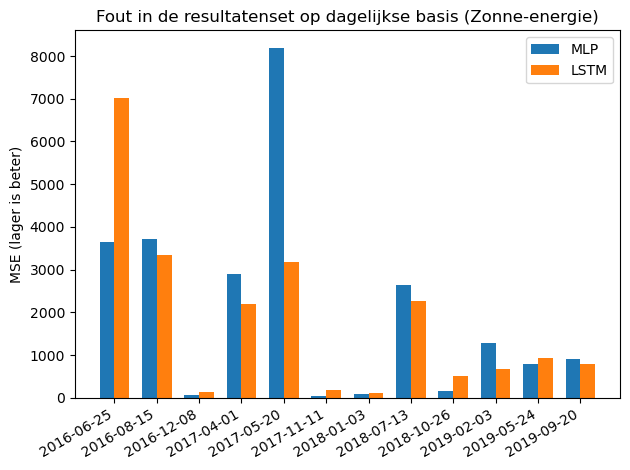

2035.9023341598875 1778.3025865929148


In [ ]:
#all of the code underneath is used to display and access results 
temlstm = []
temseq = []
for i in range(len(testdatums)):
    temlstm.append(mse(solarlstm_predictions[i][33:73],ysol_test[i][33:73]))
    temseq.append(mse(solarseq_predictions[i][33:73],ysol_test[i][33:73]))

labels = [d.strftime('%Y-%m-%d') for d in testdatums]
seq_means = temseq
lstm_means = temlstm
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, seq_means, width, label='MLP')
rects2 = ax.bar(x + width/2, lstm_means, width, label='LSTM')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y/%m/%d'))
ax.set_ylabel('MSE (lager is beter)')
ax.set_title('Fout in de resultatenset op dagelijkse basis (Zonne-energie)')
ax.set_xticks(x, labels)
ax.legend()
plt.gcf().autofmt_xdate()
fig.tight_layout()
plt.show()

print(sum(temseq)/len(temseq),sum(temlstm)/len(temlstm))

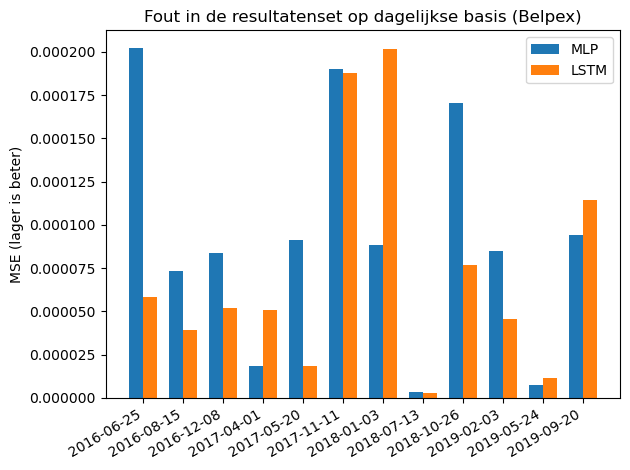

9.228800099596097e-05 7.158469607054416e-05


In [ ]:
temlstm = []
temseq = []
for i in range(len(testdatums)):
    temlstm.append(mse(belpexlstm_predictions[i][33:73],ybel_test[i][33:73]))
    temseq.append(mse(belpexseq_predictions[i][33:73],ybel_test[i][33:73]))

labels = [d.strftime('%Y-%m-%d') for d in testdatums]
seq_means = temseq
lstm_means = temlstm
x = np.arange(len(labels))  # the label locations

width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, seq_means, width, label='MLP')
rects2 = ax.bar(x + width/2, lstm_means, width, label='LSTM')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y/%m/%d'))
ax.set_ylabel('MSE (lager is beter)')
ax.set_title('Fout in de resultatenset op dagelijkse basis (Belpex)')
ax.set_xticks(x, labels)
ax.legend()
plt.gcf().autofmt_xdate()
fig.tight_layout()

plt.show()

print(sum(temseq)/len(temseq),sum(temlstm)/len(temlstm))

<function matplotlib.pyplot.show(close=None, block=None)>

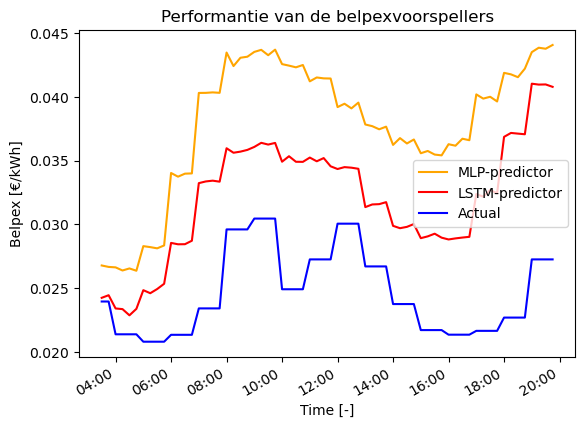

In [ ]:
time_list = [datetime.datetime(2020,1,1,0,0) + datetime.timedelta(minutes=15*i) for i in range(14,80)]

belpexseq_predictions = np.array(belpexseq_predictions)
belpexlstm_predictions = np.array(belpexlstm_predictions)
ybel_test = np.array(ybel_test)
days = 0
plt.figure()
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
plt.title("Performantie van de belpexvoorspellers")
plt.plot(time_list,belpexseq_predictions[days][14:80].flatten(),color='orange', label='MLP-predictor')
plt.plot(time_list,belpexlstm_predictions[days][14:80].flatten(),color='red',label='LSTM-predictor')
plt.plot(time_list,ybel_test[days][14:80].flatten(),color='blue',label='Actual')
plt.xlabel("Time [-]")
plt.ylabel("Belpex [€/kWh]")
plt.gcf().autofmt_xdate()
plt.legend()

plt.show

3157.9920087570813
1561.2002454456672


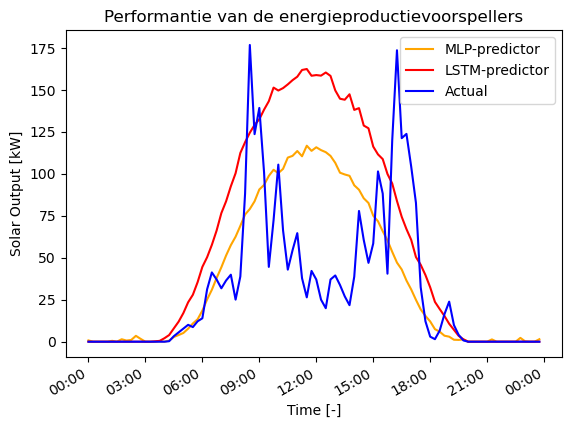

In [ ]:
time_list = [datetime.datetime(2020,1,1,0,0) + datetime.timedelta(minutes=15*i) for i in range(0,96)]
solarlstm_predictions = selfrelu(solarlstm_predictions)
solarseq_predictions = np.array(solarseq_predictions)
solarlstm_predictions = np.array(solarlstm_predictions)
ysol_test = np.array(ysol_test)

plt.figure()
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
plt.title("Performantie van de energieproductievoorspellers")
plt.plot(time_list,solarseq_predictions[days].flatten(),color='orange',label='MLP-predictor')
plt.plot(time_list,solarlstm_predictions[days].flatten(),color='red',label='LSTM-predictor')
plt.plot(time_list,ysol_test[days].flatten(),color='blue',label='Actual')
plt.xlabel("Time [-]")
plt.ylabel("Solar Output [kW]")
plt.legend()
plt.gcf().autofmt_xdate()
plt.show
print(mse(solarlstm_predictions[days],ysol_test[days]))
print(mse(solarseq_predictions[days],ysol_test[days]))

In [ ]:
if modelchoice == "seq":
    solar_predictions = solarseq_predictions
    belpex_predictions = belpexseq_predictions    
elif modelchoice == "lstm":
    solar_predictions = solarlstm_predictions
    belpex_predictions = belpexlstm_predictions

In [ ]:
MachineLearningGUI(solar_predictions,belpex_predictions, testdatums, G.DATA)

In [ ]:
predictions_sol = solar_predictions
predictions_bel = belpex_predictions
data = G.DATA
max_charge_rate = 12.5
min_charge_rate = 1.25
s=0
prices_day = []
prices_car = []
N = 30

for i in range(1,N+1):
    s = 0
    for day in testdatums:
        carslist = i*[[60,0,39]]
        bel_real = list(
            data["belpex"][day + dt.timedelta(hours=8, minutes=15):day + dt.timedelta(hours=18)])
        sun_real = list(
            data["solar"][day + dt.timedelta(hours=8, minutes=15):day + dt.timedelta(hours=18)])
        bel_sell = [i/2 for i in bel_real]
        optimized_schedule = Gurobi_optimizer(predictions_sol[testdatums.index(day)],
                                              predictions_bel[testdatums.index(day)], carslist, max_charge_rate,
                                              min_charge_rate)
        VincentRijmen, prijs =  compare_prices(optimized_schedule, create_naive_schedule(carslist, max_charge_rate), bel_real,
                                           bel_sell, sun_real)
        s+=prijs
    prices_car.append(s/len(carslist))
plt.figure(2)
plt.plot([i for i in range(1,N+1)],prices_car,color='blue',label='bespaard per auto')
plt.xticks([i for i in range(1,N+1)],rotation=45)
plt.xlabel('aantal wagens',rotation=45)
plt.ylabel('euro')
plt.grid()
plt.legend()
s=0
for day in testdatums:
        carslist = 20*[[60,0,39]]
        bel_real = list(
            data["belpex"][day + dt.timedelta(hours=8, minutes=15):day + dt.timedelta(hours=18)])
        sun_real = list(
            data["solar"][day + dt.timedelta(hours=8, minutes=15):day + dt.timedelta(hours=18)])
        bel_sell = [i/2 for i in bel_real]
        optimized_schedule = Gurobi_optimizer(predictions_sol[testdatums.index(day)],
                                              predictions_bel[testdatums.index(day)], carslist, max_charge_rate,
                                              min_charge_rate)
        VincentRijmen, prijs =  compare_prices(optimized_schedule, create_naive_schedule(carslist, max_charge_rate), bel_real,
                                           bel_sell, sun_real)
        s+=prijs
        prices_day.append(prijs)
plt.figure(3)
plt.scatter(testdatums,prices_day)
plt.xticks(testdatums,rotation=45)
plt.ylabel('euro')
plt.grid()

Restricted license - for non-production use only - expires 2024-10-28


GurobiError: Model too large for size-limited license; visit https://www.gurobi.com/free-trial for a full license